## Задание

Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

2. Оцените ошибку модели из п.2 .

3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.
4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

    а) Изменение температуры за окном :).
    
    б) Количество денег, которые тратят покупатели в интернет магазине.
    
    в) Вес растущего котенка.
    
    г) Прирост объема деревьев в лесу от времени

In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

In [3]:
data = pd.read_csv('my_PJME_MW.csv',  parse_dates = {'Date Time' : [0, 1]} )
data = data.set_index('Date Time')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 12 columns):
PJME_MW            145374 non-null float64
year               145374 non-null int64
month              145374 non-null int64
dayofmonth         145374 non-null int64
quarter            145374 non-null int64
dayofyear          145374 non-null int64
weekofyear         145374 non-null int64
dayofweek          145374 non-null int64
hour               145374 non-null int64
is_holiday         145374 non-null int64
is_prev_holiday    145374 non-null int64
is_next_holiday    145374 non-null int64
dtypes: float64(1), int64(11)
memory usage: 14.4 MB


In [4]:
data.head(4)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date Time,,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01 02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01 03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01 04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0


In [5]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


In [6]:
data['date'] = data.index
count_data = data['date'].value_counts()
mask = count_data.values != 1
notvalid_days = pd.Series(count_data.values[mask], count_data.index[mask])

In [7]:
notvalid_days 

2014-11-02 02:00:00    3
2015-11-01 02:00:00    3
2016-11-06 02:00:00    3
2017-11-05 02:00:00    3
dtype: int64

In [8]:
full_list_date = pd.date_range(data.index.min(), data.index.max(), freq="H")
diff_list = set(full_list_date) - set(data.index.unique())
print(f'Количество пропущенных часов: {len(diff_list)}')
diff_list

Количество пропущенных часов: 26


{Timestamp('2002-04-07 03:00:00', freq='H'),
 Timestamp('2002-10-27 02:00:00', freq='H'),
 Timestamp('2003-04-06 03:00:00', freq='H'),
 Timestamp('2003-10-26 02:00:00', freq='H'),
 Timestamp('2004-04-04 03:00:00', freq='H'),
 Timestamp('2004-10-31 02:00:00', freq='H'),
 Timestamp('2005-04-03 03:00:00', freq='H'),
 Timestamp('2005-10-30 02:00:00', freq='H'),
 Timestamp('2006-04-02 03:00:00', freq='H'),
 Timestamp('2006-10-29 02:00:00', freq='H'),
 Timestamp('2007-03-11 03:00:00', freq='H'),
 Timestamp('2007-11-04 02:00:00', freq='H'),
 Timestamp('2008-03-09 03:00:00', freq='H'),
 Timestamp('2008-11-02 02:00:00', freq='H'),
 Timestamp('2009-03-08 03:00:00', freq='H'),
 Timestamp('2009-11-01 02:00:00', freq='H'),
 Timestamp('2010-03-14 03:00:00', freq='H'),
 Timestamp('2010-11-07 02:00:00', freq='H'),
 Timestamp('2010-12-10 00:00:00', freq='H'),
 Timestamp('2011-03-13 03:00:00', freq='H'),
 Timestamp('2011-11-06 02:00:00', freq='H'),
 Timestamp('2012-03-11 03:00:00', freq='H'),
 Timestamp

Некорректные часы
1. 26 дней, в которых скорее всего произошел сбой, поэтому необходимо восстановить пропущенные часы
2. 4 дня, в которых происходил переход времени или иной сбой, дубликаты нужно усреднить и отбросить лишние

Удаляем дубликаты часов усреднением:

In [9]:
condition = np.logical_and(data['date'].isin(notvalid_days.index), data['hour']==2)
df = data.loc[condition]
df_ = df.groupby(['date']).mean()
before = data.shape
data = data.loc[np.logical_not(condition)]
data = data.append(df_,sort = False)
print(f'{before} - {data.shape} = {before[0]- data.shape[0]}')

(145374, 13) - (145366, 13) = 8


Дополняем пропущенные часы в 26 днях средними значениями ближайших часов

In [10]:
from datetime import timedelta
before = data.shape
for item in diff_list:
    data.loc[item] = data.loc[item-timedelta(hours=1)]
    data.loc[item,'PJME_MW'] = (data.loc[item-timedelta(hours=1),'PJME_MW'] + data.loc[item+timedelta(hours=1),'PJME_MW'])/2
    data.loc[item,'hour'] = data.loc[item,'hour'] + 1

#data.loc[diff_list]


In [11]:
print(f'{before} - {data.shape} = {before[0]- data.shape[0]}')

(145366, 13) - (145392, 13) = -26


In [12]:
data = data.drop(columns = 'date')

In [13]:
# проверим пропуски
data['PJME_MW'].isnull().sum()

0

In [14]:
data = data.sort_index()

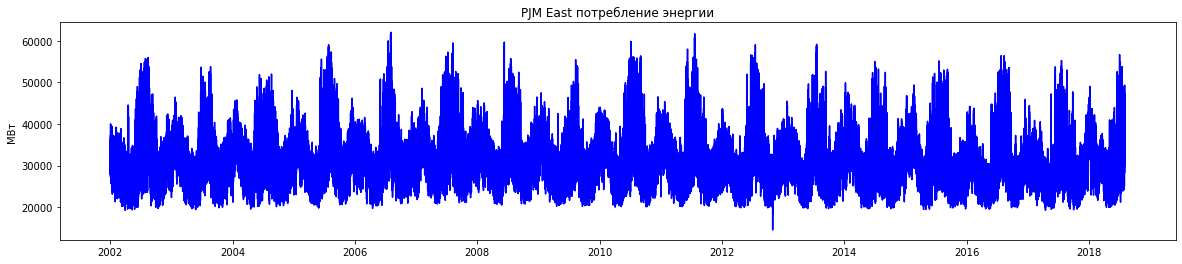

In [15]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [16]:
d_data=data.resample('D').mean()

Проведем тест стационарности по Дики-Фуллеру

In [17]:
import statsmodels.api as sm

In [18]:
d_data = data['PJME_MW'].values[1:]-data['PJME_MW'].values[:-1]
DF_data_d = sm.tsa.stattools.adfuller(d_data,regression='ctt')
DF_data_d

(-53.906259665495355,
 0.0,
 75,
 145315,
 {'1%': -4.371209747077094,
  '5%': -3.8324306412686706,
  '10%': -3.5532851841614925},
 2092198.935107688)

В соответствии с тестом ADF - это стационарный ряд

In [19]:
d_data=data.resample('D').mean()
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)

In [20]:
data_seson_free = pd.DataFrame(data = (np.array(d_data['PJME_MW']).reshape((d_data['PJME_MW'].shape[0],1)) -data_exp_1))
DF_ = sm.tsa.stattools.adfuller( data_seson_free.iloc[:,0] , regression = 'ctt')
DF_

(-8.365750392689266,
 4.273601466697894e-11,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 107623.77340674945)

В соответствии с тестом ADF - это стационарный ряд

Добавим истории

In [21]:
b_s = pd.DataFrame(data = d_data[['PJME_MW']])
df= pd.DataFrame(data_exp_1, index = b_s.index)
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]

Построим модель

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

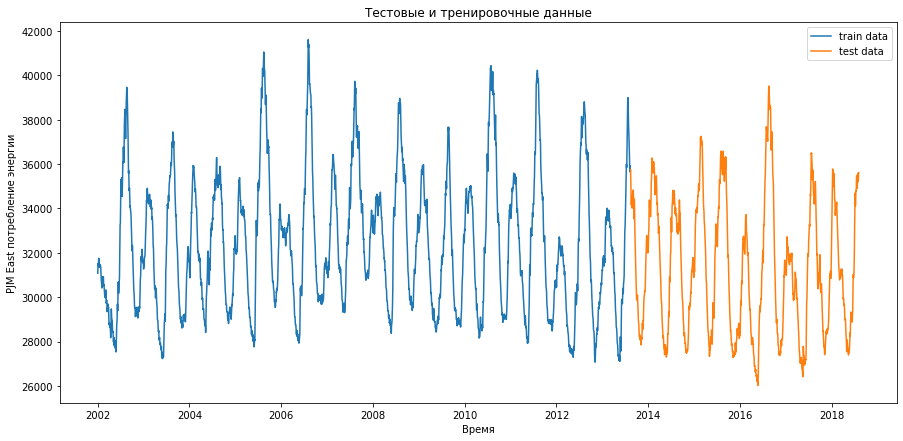

In [23]:
# сделаем примеры и модель 
def split_data_b( data, koeff ):
    last_train_date = data.index.min() + timedelta(int(data.shape[0]*(1-koeff)))
    
    return data.loc[data.index <= last_train_date].copy(), \
           data.loc[data.index >  last_train_date].copy(), \
           last_train_date

train_b, test_b, days_delta = split_data_b( df, 0.3)

X_train_b = train_b.iloc[:-1,:]
y_train_b = train_b[df.columns[0]].values[1:]
X_test_b = test_b.iloc[:-1,:]
y_test_b = test_b[df.columns[0]].values[1:]


plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('PJM East потребление энергии')
plt.plot(train_b.index, train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index, test_b[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)
er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

ошибка градиентного бустинга :   0.5767280723023964 %


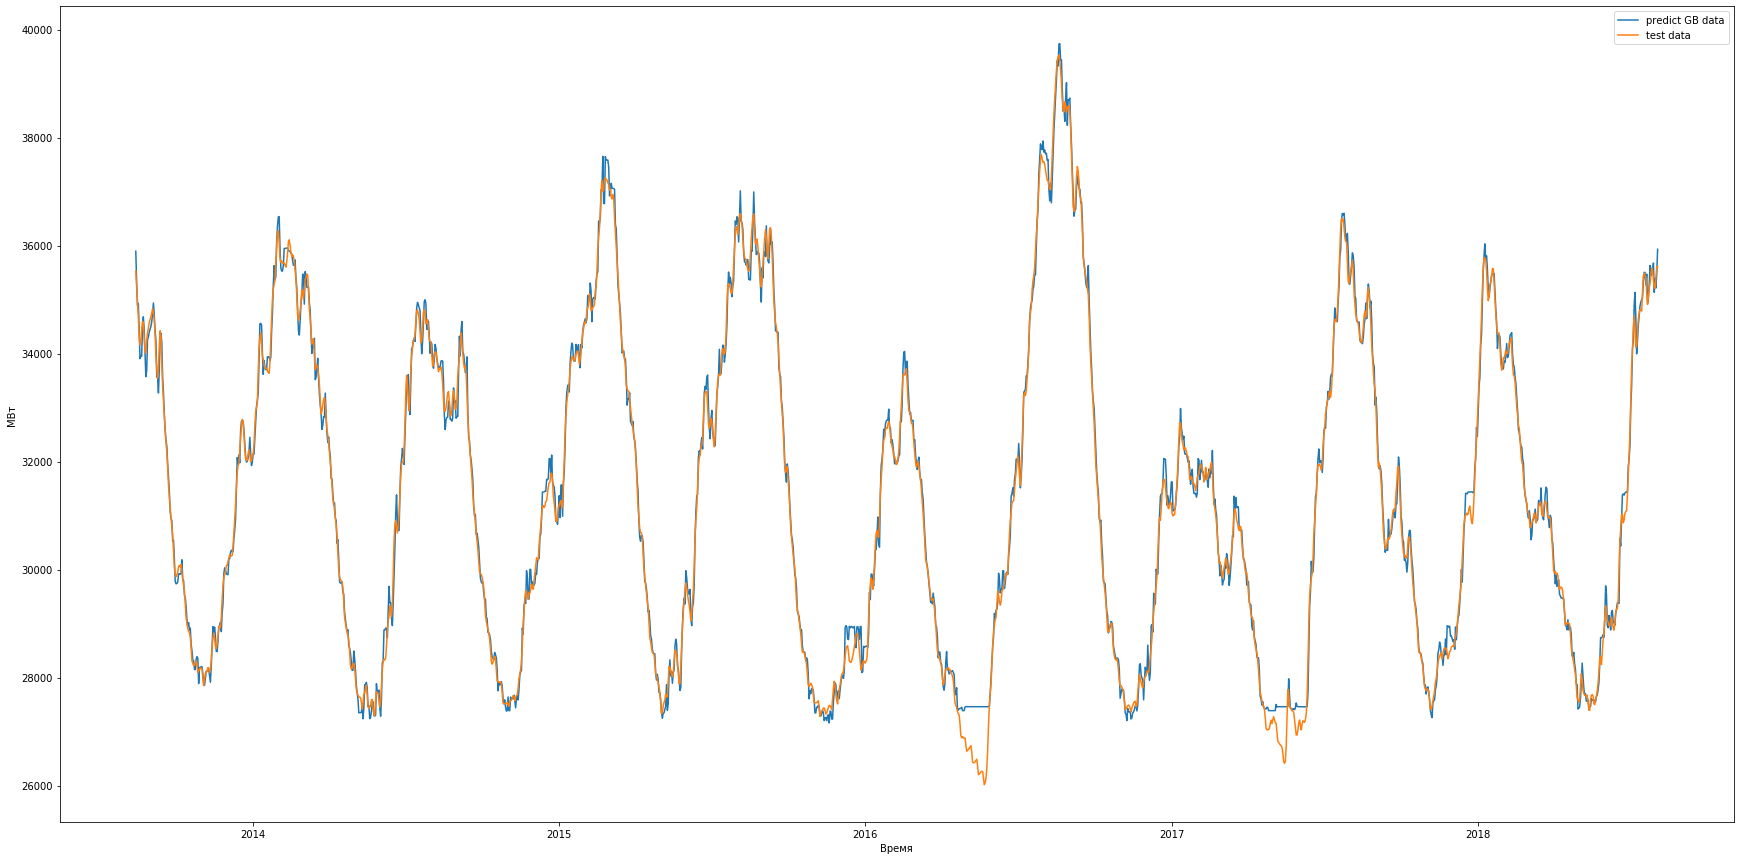

In [25]:
plt.figure( figsize=( 30, 15 ))

plt.xlabel('Время')
plt.ylabel('МВт')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[1:],y_test_b, label='test data')
plt.legend()
plt.show()


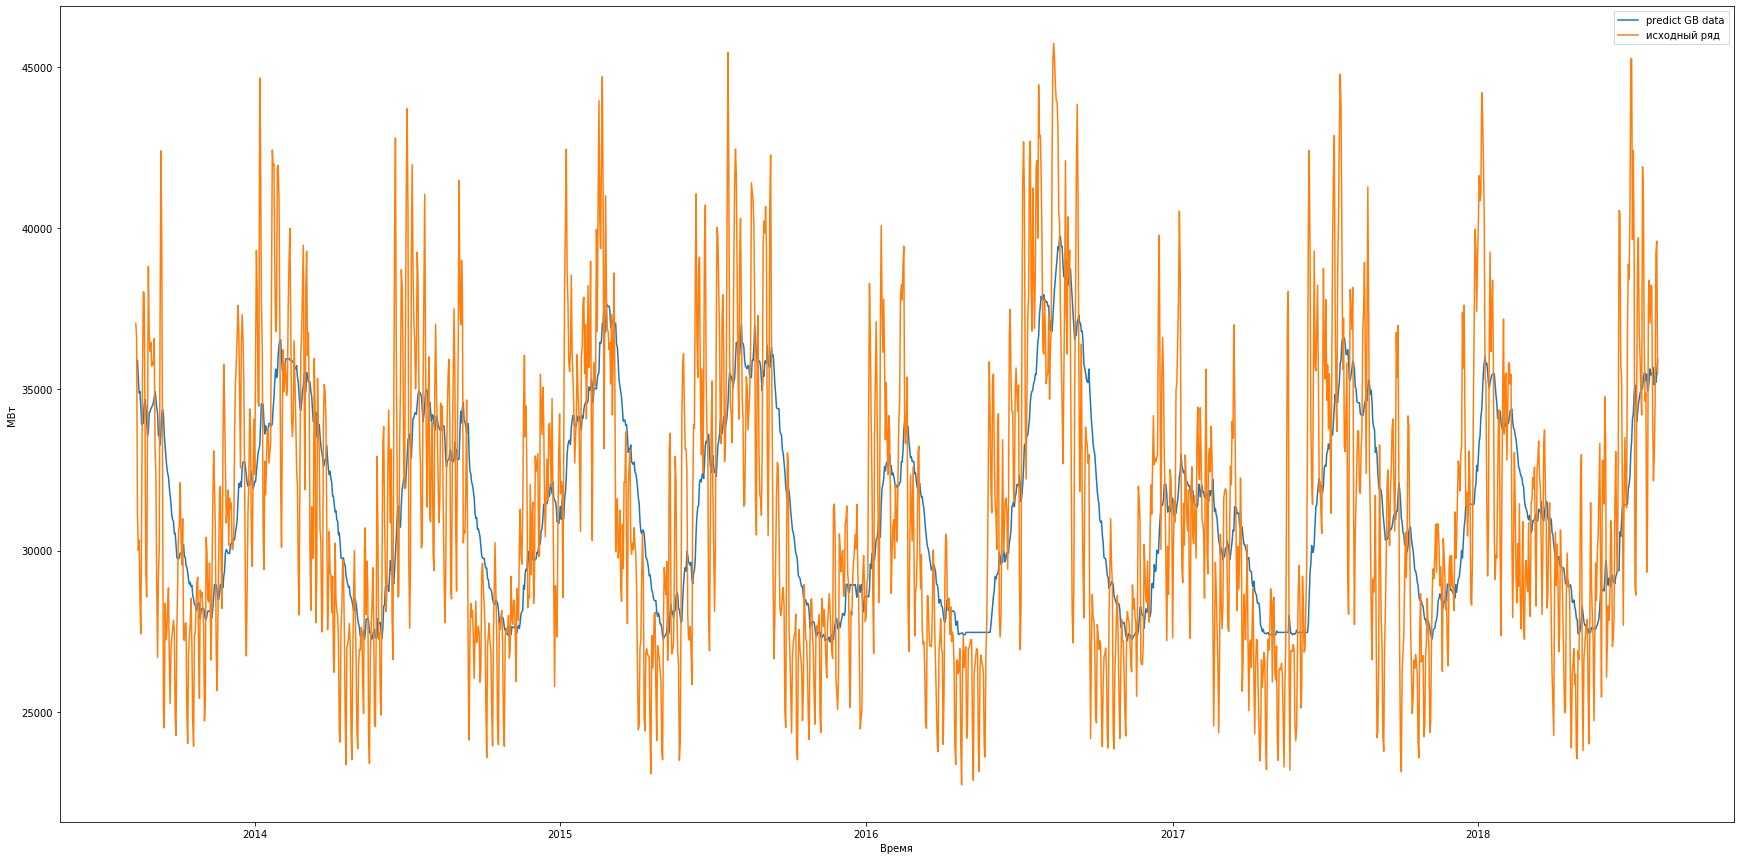

In [26]:
plt.figure( figsize=( 30, 15 ))

plt.xlabel('Время')
plt.ylabel('МВт')
plt.plot(test_b.index[1:],X_test_pred_gb, label='predict GB data' )
plt.plot(b_s[days_delta:].index, b_s[days_delta:]['PJME_MW'], label='исходный ряд')
plt.legend()
plt.show()

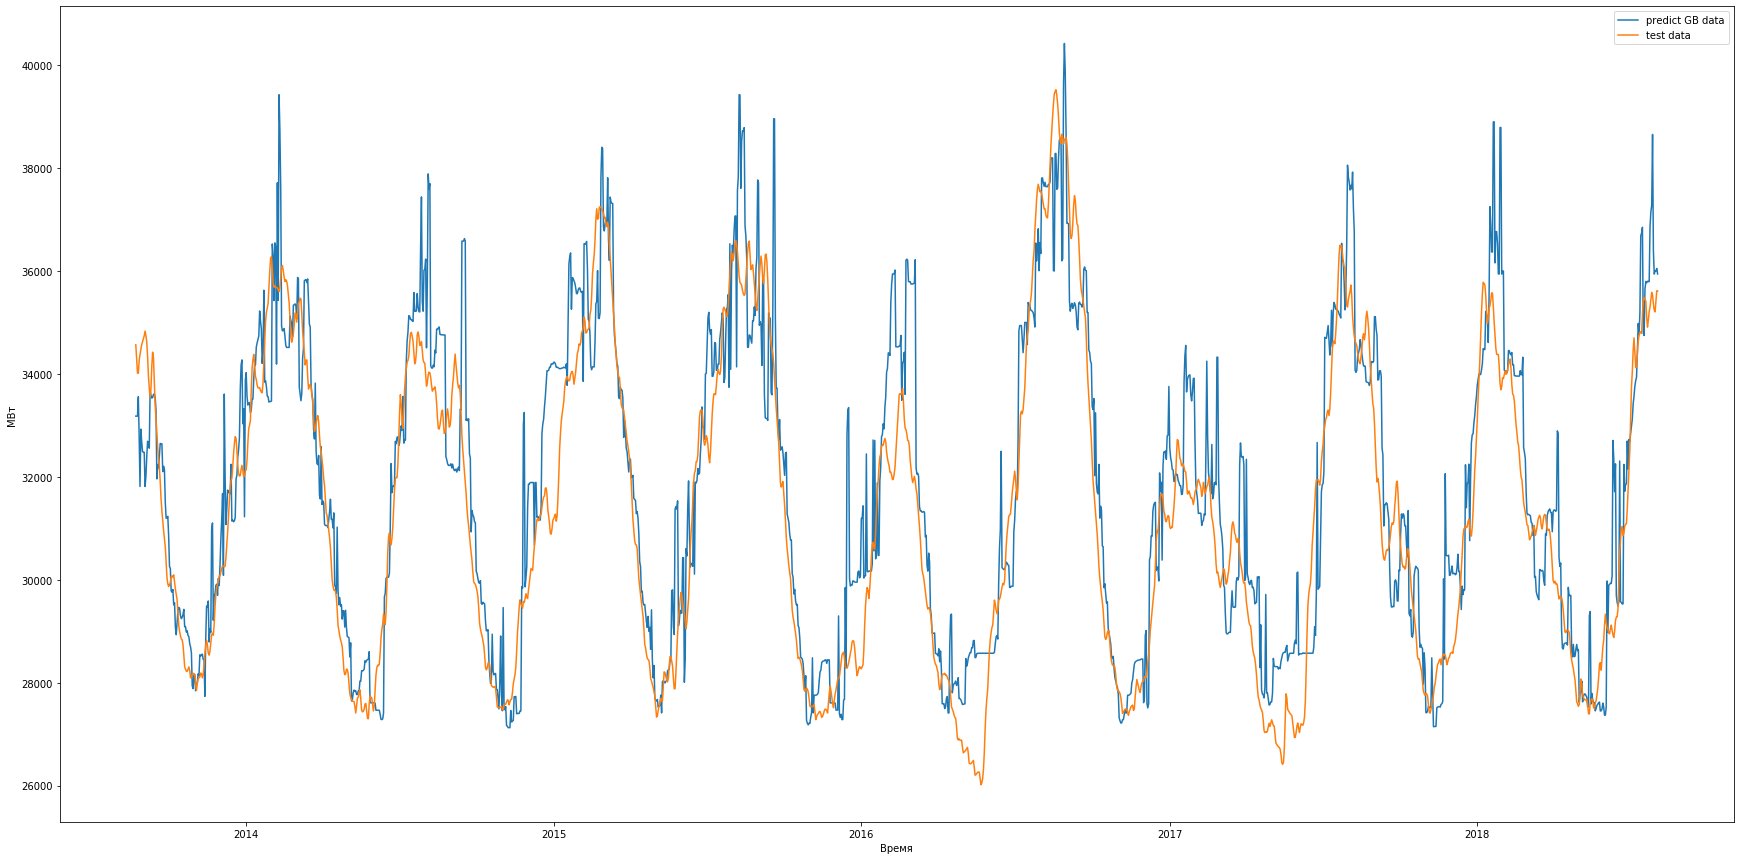

ошибка градиентного бустинга :   3.300811764966917 %


In [27]:
h=10
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

model_gb.fit( X_train_b, y_train_b ) 
X_test_pred_gb = model_gb.predict(X_test_b)

plt.figure( figsize=( 30, 15 ))

plt.xlabel('Время')
plt.ylabel('МВт')
plt.plot(test_b.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_b.index[h:],y_test_b, label='test data')
plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')


###### Вывод
С увеличением глубины прогноза ошибка возрастает

4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

    а) Изменение температуры за окном :).
    
    б) Количество денег, которые тратят покупатели в интернет магазине.
    
    в) Вес растущего котенка.
    
    г) Прирост объема деревьев в лесу от времени

а) Изменение температуры за окном не является стационарным, т.к. есть годовая сезонность, суточная сезонность.    
Кроме этого, есть гипотеза о "глобальном потеплении":если брать весь период наблюдений, то существует тренд на увеличение температуры либо цикл от "ледникового периода" до "глобального потепления".  

б) Количество денег, которые тратят покупатели в интернет магазине не является стационарным  
Сезонность зависит от рода товаров, продаваемых в интернет магазине.
Есть ежегоднные периоды с низким и высоким спросом. Продажи  в выходные дни - сезоны высоких продаж.
Даже в течение дня есть время, когда товары покупают чаще.  
Существуют тренды, возникающие из-за инфляции, расширения бизнеса.  

в) Вес растущего котенка.  
С каждым днем у здорового котенка должен увеличиваться вес, что является явным трендом и ряд не может быть стационарным  
Если, конечно, котенка не измеряют каждые 5 минут в течение 5 часов, то тогда ряд будет больше зависеть от точности измерений и будет стационарным.  

г) Прирост объема деревьев в лесу от времени  
Прирост на коротких промежутках времени может быть стационарным.
При этом периодически будут циклы между пожарами от полной гибели до полного восстановления.
Если брать более длительные периоды, то из-за влияния деятельности человека есть тренд на снижение объемов.
В лесах (не тронутых катаклизмами и человеком) могут быть временные ряды стационарными длительное время (старые погибают, их место занимают новые, сохранняя баланс)  